# Оптимизация маркетинговых затрат в Яндекс.Афише

## Описание проекта
На основе данных о посещениях сайта Яндекс.Афиши изучить как люди пользуются продуктом, 
когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается.

1. [Изучение общей информации.](#Шаг-1.-Изучение-общей-информации.)
2. [Расчет продуктовых метрик.](#Шаг-2.-Расчет-продуктовых-метрик.)
3. [Расчет метрик электронной коммерции.](#Шаг-3.-Расчет-метрик-электронной-коммерции.)
4. [Расчет маркетинговых метрик.](#Шаг-4.-Расчет-маркетинговых-метрик.)
5. [Общий вывод](#Шаг-5.-Общий-вывод.)

### Шаг 1. Изучение общей информации.

Импортирование модулей, необходимых для работы

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def df_view(df):
    """
    Быстрый обзор таблицы
    """
    display(df)
    a = df.duplicated().sum()
    print(df.info())
    print()
    print('Количество дубликатов в таблице', a)

Чтение данных и визуалиция таблиц

Таблица `visits` содержит информацию о посещениях сайта

In [3]:
visits = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

Количество дубликатов в таблице 0


Пропущенных значений и дубликатов в таблице нет. Названия столбцов приведем к единому регистру и добавим подчеркивание в промежутки между словами. Также поменяем тип данных колонок `End Ts` и `Start Ts` на `datetime`. Проверим результат

In [4]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
df_view(visits)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None

Количество дубликатов в таблице 0


Таблица `orders` содержит информацию о заказах

In [5]:
orders = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Количество дубликатов в таблице 0


Пропущенных значений и дубликатов в таблице нет. Названия столбцов приведем к единому регистру и добавим подчеркивание в промежутки между словами. Также поменяем тип данных колонок `Buy Ts` на `datetime`. Проверим результат

In [6]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
df_view(orders)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

Количество дубликатов в таблице 0


Таблица `costs` содержит информацию о расходах на маркетинг

In [7]:
costs = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

Количество дубликатов в таблице 0


Пропущенных значений и дубликатов в таблице нет. Названия столбцов корректны. Поменяем тип данных колонки `dt` на `datetime`. 

In [8]:
costs['dt'] = pd.to_datetime(costs['dt'])
df_view(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None

Количество дубликатов в таблице 0


Посмотрим на доступные типы устройств и источников

In [9]:
print(visits['device'].value_counts(), visits['source_id'].value_counts())

desktop    262567
touch       96833
Name: device, dtype: int64 4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64


In [10]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

#### Вывод
Данные для анализа представлены в 3 таблицах `visits`, `orders` и `costs`.

Таблица `visits` имеет 5 столбцов с данными:
`device` - категория устройства пользователя,
`end_ts` - дата и время окончания сессии,
`source_id` - идентификатор источника перехода на сайт,
`start_ts`- дата и время начала сессии,
`uid`- уникальный идентификатор пользователя.

Таблица `orders` имеет 3 столбца с данными:
`uid`- уникальный идентификатор пользователя,
`buy_ts` - дата и время заказа,
`revenue`- сумма заказа.

Таблица `costs` имеет 3 столбца с данными:
`source_id`- идентификатор рекламного источника,
`dt` - дата рекламной компании,
`costs`- расходы на компанию.

В таблицах нет пропущенных значений и дубликатов. Названия стобцов приведены к единому нижнему регистру и разделителем между словами служит подчеркивание. Тип данных к колонках `end_ts`, `start_ts`, `buy_ts`, `dt` изменены на `datetime`. Другие замены не требуются. Данные готовы к анализу.

Пользователи в 2,7 раза чаще заходят на сайт с компьютера, чем с мобильных устройств. Что касается источников - у пользователей есть исчтоники перехода №6 и №7, число пользователей, зашедших с них пока небольшое, но при этом эти источники не финансируются компанией. И, наоборот, источник №4, в который компания вкладывает деньги, не является источником перехода для пользователей.


### Шаг 2. Расчет продуктовых метрик.

Рассчитаем DAU, WAU и MAU. Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [11]:
visits['session_year']  = visits['start_ts'].astype('datetime64[Y]')
visits['session_month']  = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date']  = visits['start_ts'].astype('datetime64[D]')
print(visits.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_year session_month session_week session_date  
0  16879256277535980062   2017-01-01    2017-12-01   2017-12-14   2017-12-20  
1    104060357244891740   2018-01-01    2018-02-01   2018-02-15   2018-02-19  
2   7459035603376831527   2017-01-01    2017-07-01   2017-06-29   2017-07-01  
3  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20  
4   9969694820036681168   2017-01-01    2017-12-01   2017-12-21   2017-12-27  


Сгруппируем данные по уникальным пользователям и найдём среднее

In [12]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})

print('Среднее количество уникальных пользователей в день', dau.mean())
print('Среднее количество уникальных пользователей в неделю', wau.mean())
print('Среднее количество уникальных пользователей в месяц', mau.mean())

Среднее количество уникальных пользователей в день uid    907.991758
dtype: float64
Среднее количество уникальных пользователей в неделю uid    5621.703704
dtype: float64
Среднее количество уникальных пользователей в месяц uid    23228.416667
dtype: float64


Напишем функцию для построения графиков на протяжении всего проекта.
Отобразим изменения метрик во времени на графиках

In [13]:
def picture(df, x, y, z, **kwargs):
    df.plot(x, y, kind=z, **kwargs)
    plt.axhline(y=df[y].mean(), ls='--', label='mean', color='red')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True, color='grey', axis='x', linestyle = "-.")

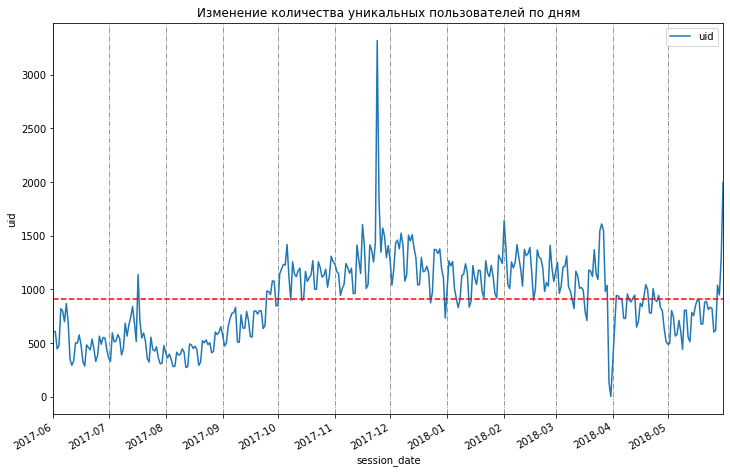

In [14]:
picture(dau.reset_index(), 'session_date', 'uid', 'line', figsize=(12,8), title='Изменение количества уникальных пользователей по дням')

С августа 2017 года начался активный рост числа новых пользователей в день, который с октября 2017 года стабильно превышал среднее значение новых пользователей. Пик приходится на конец ноября-начало декабря (возможно связан с активной продажей билетов перед новогодними праздниками, гастролями). В конце марта наблюдается резкое падение числа новых пользователей - связано скорей всего с закрытием театрального сезона.

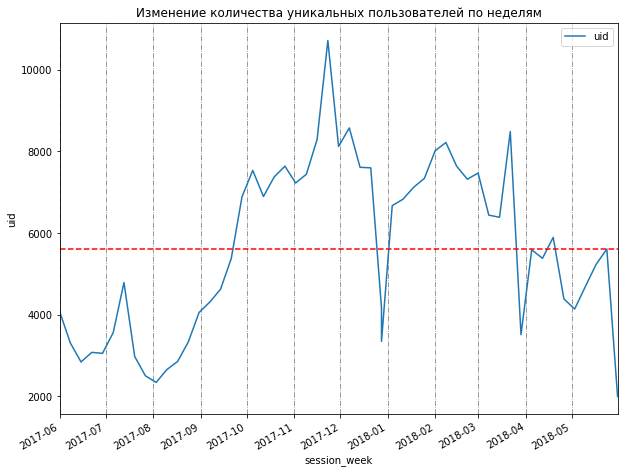

In [15]:
picture(wau.reset_index(), 'session_week', 'uid', 'line', figsize=(10,8), title='Изменение количества уникальных пользователей по неделям')

График изменения количества уникальных пользователей по неделям подтвердает вывод по дням. Но на этом графике более четко видно падение пользователей в конце декабря. Скорей всего это связано с предшествующим падению пиком, то есть люди уже воспользовались сайтом перед этим и больше не покупают. Затем снова виден активный рост до закрытия театрального сезона.

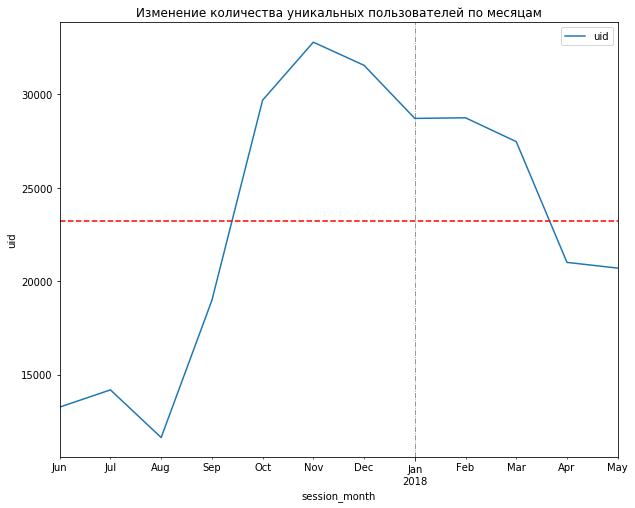

In [16]:
picture(mau.reset_index(), 'session_month', 'uid', 'line', figsize=(10,8), title='Изменение количества уникальных пользователей по месяцам')

График по месяцам подтвержает,  количество уникальных пользователей с августа 2017 года растет, максимум пришелся на середину ноября 2017 года.

Подсчитаем, сколько раз в день пользователи заходят на сайт

In [17]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
print(sessions_per_user)
print(sessions_per_user.mean())

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           664      605           1.097521
2017-06-02           658      608           1.082237
2017-06-03           477      445           1.071910
2017-06-04           510      476           1.071429
2017-06-05           893      820           1.089024
...                  ...      ...                ...
2018-05-27           672      620           1.083871
2018-05-28          1156     1039           1.112608
2018-05-29          1035      948           1.091772
2018-05-30          1410     1289           1.093871
2018-05-31          2256     1997           1.129695

[364 rows x 3 columns]
n_sessions           987.362637
n_users              907.991758
sessions_per_user      1.082170
dtype: float64


Пользователи редко посещают сайт второй раз за день. Из среднего видно, что только 8% пользователей посещают сайт 2 раза в день. На мой взгляд для Яндекс.Афиша это хороший показатель. Пользователи ежедневно смотрят просматривают обновление сайта и возникновение на нем новых событий.

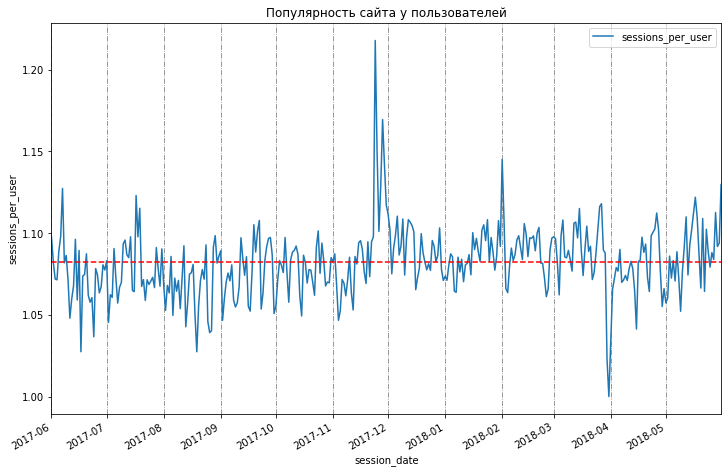

In [18]:
picture(sessions_per_user.reset_index(), 'session_date', 'sessions_per_user', 'line', figsize=(12,8), title='Популярность сайта у пользователей')

В целом из графика видно, что количество заходов на сайт увеличивается во времени по сравнению со средним значением, то есть популярность сайта растет.

In [19]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('Среднее время сессии', visits['session_duration_sec'].mean()) 

Среднее время сессии 643.506488592098


Среднее время сессии 643 секунды, то есть 10,7 минут. Как раз достаточно для того, чтобы просмотреть появление новых событий.

Посмотрим на распределение

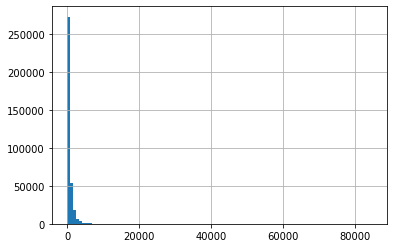

In [20]:
visits['session_duration_sec'].hist(bins=100) 

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего), построим боксплот:

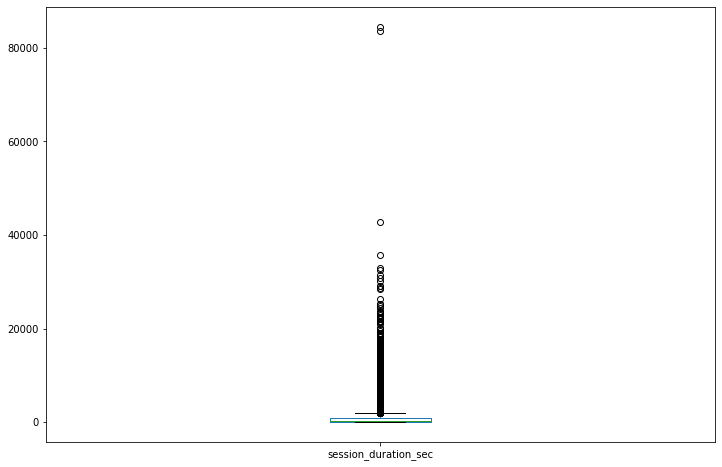

In [21]:
visits['session_duration_sec'].plot(kind='box',figsize=(12, 8))

Во времени сессии, как видно из графика, достаточно много результатов, далеких от среднего, которые и дают нам искажение распределения. В этом случае, мы будем ориентирвоаться на медианное значение 300 секунд, т.е. примерно 5 минут пользователь проводит на сайте. При этом самое часто встречающее значение, найденное с помощью `mode()` получается 60 секунд, т.е 1 минута.

In [22]:
print(visits['session_duration_sec'].mode(), visits['session_duration_sec'].describe()) 

0    60
dtype: int64 count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64


Рассчитаем коэффициент удержания (Retention Rate), применяя когортный анализ.

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь первый раз зашел на сайт.

In [23]:
first_visit = visits.groupby(['uid'])['start_ts'].min()
first_visit.name = 'first_start_ts'
visits = visits.merge(first_visit, on='uid') 
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_start_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00


Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты.

In [24]:
visits['first_start_ts_m'] = visits['first_start_ts'].astype('datetime64[M]')
visits['start_ts'] = visits['start_ts'].astype('datetime64[M]')
visits['cohort_lifetime'] = visits['start_ts'] - visits['first_start_ts_m']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_start_ts,first_start_ts_m,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-01,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-01,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-01,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-01,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,0


Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»

In [25]:
cohorts = visits.groupby(['first_start_ts_m','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_start_ts_m,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц.

In [26]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_start_ts_m', 'uid']] 
initial_users_count.head(10)

,first_start_ts_m,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Переименуем столбец `uid` в `cohort_users` методом `rename()`

In [27]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count.head()

,first_start_ts_m,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Объединим данные по когортам с исходным количеством пользователей в когорте и рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте.

In [28]:
cohorts = cohorts.merge(initial_users_count, on='first_start_ts_m')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

Построим сводную таблицу и создадим тепловую карту

In [29]:
retention_pivot = cohorts.pivot_table(index='first_start_ts_m', columns='cohort_lifetime', values='retention', aggfunc='sum') 
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_start_ts_m,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


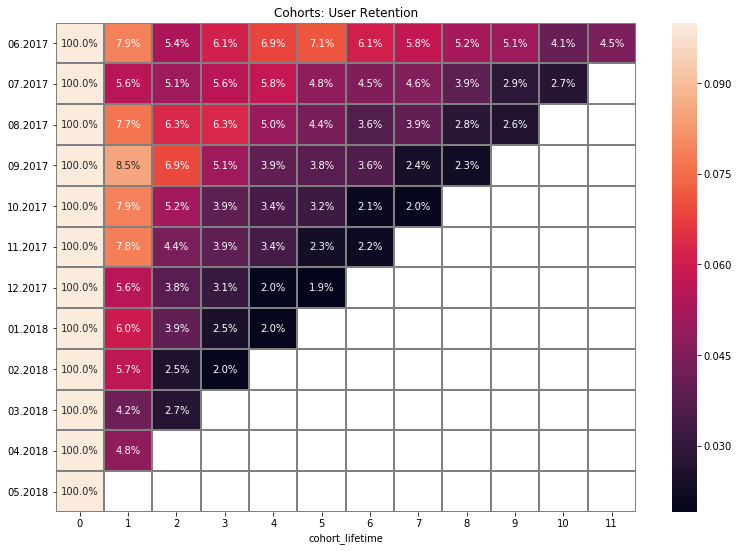

In [30]:
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
retention_pivot.index = retention_pivot.index.strftime('%m.%Y')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1)
#retention_pivot.index.strftime('%m.%Y')
plt.show()

Из графика можно сделать вывод, что коэффициент удержания максимальный в когорте сентября 2017, достаточно высок в июне, октябре и ноябре на второй месяц жизни когорт.

In [31]:
retention_mean = cohorts[cohorts['cohort_lifetime'] == 1]['retention'].mean()
print('Средний Retention Rate на второй месяц жизни когорт', retention_mean)

Средний Retention Rate на второй месяц жизни когорт 0.06516659710392834


Получается, что на втором месяце в среднем возвращается 6,5% пользователей.

#### Вывод
Рассчитали и проанализировали продуктовые метрики DAU, WAU, MAU. Опеределили, сколько раз в день с среднем посетители заходят на сайт и сколько времени на нем проводят. Рассчитали коэффициент удержания, применяя когортный анализ.

С августа 2017 года наблюдаем активный рост числа новых пользователей в день, который с октября 2017 года стабильно превышал среднее значение новых пользователей. Пик приходится на конец ноября-начало декабря (возможно связан с активной продажей билетов перед новогодними праздниками, гастролями). В конце марта наблюдается резкое падение числа новых пользователей - связано скорей всего с закрытием театрального сезона. Графики по неделям и месяцам подтвердают наши выводы.

Пользователи в среднем посещают сайт 1 раз в день и проводят на нем судя по медианному значению 5 минут, этого времени вполне достоточно, чтобы ознакомится с предстоящими событиями в мире культуры. При этом большинство людей заходят на сайт всего на 1 минуту.
Коэффициент удержания максимальный в когорте сентября 2017, достаточно высок в июне, октябре и ноябре на второй месяц жизни когорт.
На втором месяце жизни когорт в среднем возвращается 6,5% пользователей.

### Шаг 3. Расчет метрик электронной коммерции.

Посмотрим, сколько времени проходит с момента первого посещения сайта до совершения покупки.

In [32]:
first_order = orders.groupby(['uid'])['buy_ts'].min()
first_order.name = 'first_buy_ts'
orders = orders.merge(first_order, on='uid') 
display(orders)


,buy_ts,revenue,uid,first_buy_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00


In [33]:
visit_order = orders.merge(visits, on ='uid')
visit_order

,buy_ts,revenue,uid,first_buy_ts,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration_sec,first_start_ts,first_start_ts_m,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,desktop,2017-06-01 00:11:00,1,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,120,2017-06-01 00:09:00,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,desktop,2017-06-01 00:25:00,2,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,660,2017-06-01 00:14:00,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,desktop,2017-06-01 00:34:00,2,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,540,2017-06-01 00:25:00,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,desktop,2017-06-01 00:33:00,2,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,1140,2017-06-01 00:14:00,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,desktop,2017-06-01 07:59:00,3,2017-06-01,2017-01-01,2017-06-01,2017-06-01,2017-06-01,1680,2017-06-01 07:31:00,2017-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,desktop,2018-01-15 10:47:00,4,2018-01-01,2018-01-01,2018-01-01,2018-01-11,2018-01-15,480,2017-10-23 12:32:00,2017-10-01,3
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,desktop,2017-12-12 16:21:00,5,2017-12-01,2017-01-01,2017-12-01,2017-12-07,2017-12-12,60,2017-10-23 12:32:00,2017-10-01,2
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,desktop,2017-10-23 12:36:00,3,2017-10-01,2017-01-01,2017-10-01,2017-10-19,2017-10-23,240,2017-10-23 12:32:00,2017-10-01,0
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,desktop,2017-11-15 17:18:00,4,2017-11-01,2017-01-01,2017-11-01,2017-11-09,2017-11-15,600,2017-10-23 12:32:00,2017-10-01,1


In [34]:
visit_order['time_pur'] = (visit_order['first_buy_ts'] - visit_order['first_start_ts']).dt.seconds
time_mean = visit_order['time_pur'].mean()
print('Среднее время до совершения покупки', time_mean)

Среднее время до совершения покупки 31050.67729753074


Среднее время совершения покупки 8,6 часа. Но разбос по данным значительный, поэтому посмотрим еще на значение медианы и найдем mode - самое часто встречающееся значение.

In [35]:
visit_order['time_pur'].describe()


count    761807.000000
mean      31050.677298
std       32985.318684
min           0.000000
25%         780.000000
50%       20400.000000
75%       67020.000000
max       86340.000000
Name: time_pur, dtype: float64

In [36]:
visit_order['time_pur'].mode()

0    0
dtype: int64

Медианное значение времени совершения покупки составляет 20400 секунд или 5,6 часа.
При этом самое часто встречающее значение 0 секунд,  и это нормально - часто бывает, что первое зарегистрированное событие от пользователя в системе это именно покупка.

Рассчитаем среднее количество покупок, сделанных одним покупателем за период.

In [37]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
 
cohort_sizes = (first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
 
cohort_sizes.columns = ['first_order_month', 'n_buyers']
 
orders_first_month = pd.merge(orders, first_orders, on ='uid')
 
cohorts = (orders_first_month.groupby(['first_order_month', 'order_month']).agg({'uid': 'count'}).reset_index())
 
report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['n_buy'] = report['uid'] / report['n_buyers']
 
 
output = report.pivot_table(index ='first_order_month', columns ='age', values ='n_buy', aggfunc ='mean')
output = output.cumsum(axis=1).fillna(0)
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,0.000000
2017-08-01,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,0.000000,0.000000
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,0.000000,0.000000,0.000000
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.121611,1.182416,1.205149,1.224322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Из таблицы видно, за все время не так много покупок - ~1.5, при этом количество покупок на 1 покупателя растет, при этом практически не зависит от выбранной когорты.
Но при более внимательном рассмотрении, можно заметить, что в когорте июня число покупок растет быстрее. Возможно, что это запланированные заранее сделанные покупки билетов на гастроли или мероприятия уже в сентябре.

Рассчитаем средний чек, применяя группировку по времени совершения покупки. Выведем зависимость на графике

In [38]:
orders['order_day']= orders['buy_ts'].astype('datetime64[D]')
order_gr = orders.groupby('order_day').agg({'revenue':'mean'})
order_gr

,revenue
order_day,
2017-06-01,4.056875
2017-06-02,2.919910
2017-06-03,2.484776
2017-06-04,2.957727
2017-06-05,2.742174
...,...
2018-05-28,3.936170
2018-05-29,2.598201
2018-05-30,4.911971


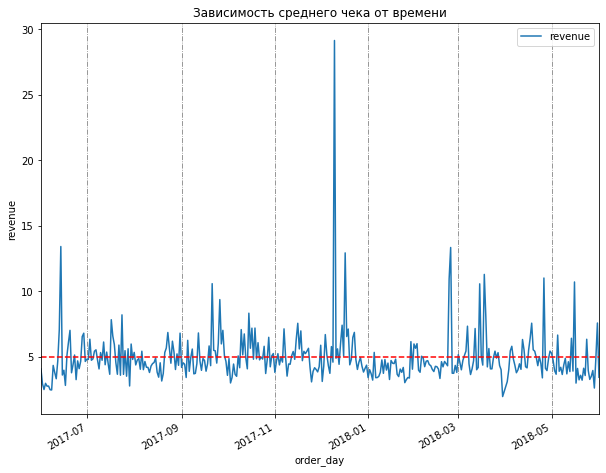

In [39]:
picture(order_gr.reset_index(), 'order_day', 'revenue', 'line', figsize=(10,8), title='Зависимость среднего чека от времени')

График зависимости среднего чека от времени имеет множество небольших пиков с периодичностью раз в три месяца, возможно это связано с покупками дорогостоящих билетов. Большой пик приходится на декабрь (традиционно подъем цен на новогодние праздники и события).

In [40]:
print('Общий средний чек {:.2f}'.format(orders['revenue'].mean()))

Общий средний чек 5.00


Выясним, как меняется LTV (итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок) по когортам. Маржинальность по условиям составляет 100%

In [41]:
orders_new = pd.merge(orders,first_orders, on='uid')
cohorts = (orders_new.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

margin_rate = 1.0

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
print(report.head())


  first_order_month  n_buyers order_month  revenue       gp  age
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023  2017-07-01   981.82   981.82    1
2        2017-06-01      2023  2017-08-01   885.34   885.34    2
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4


In [42]:
report['ltv'] = report['gp'] / report['n_buyers']

output1 = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output2 = output1.loc['2017-06-01':'2017-11-01']
output2 = output2.cumsum(axis=1).fillna(0)
output2

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,0.000000
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,0.000000,0.000000
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,0.000000,0.000000,0.000000
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,0.000000,0.000000,0.000000,0.000000
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,0.000000,0.000000,0.000000,0.000000,0.000000


Построим изменение LTV во времени в виде тепловой карты.

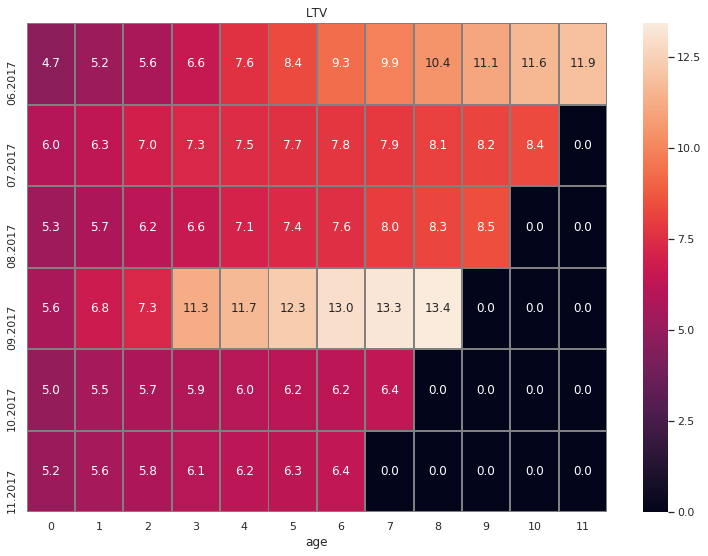

In [43]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
output2.index = output2.index.strftime('%m.%Y')
sns.heatmap(output2, annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 

Из графика видно, что максимум денег тратили клиенты сентябрской когорт с четвертого месяца жизни когорты и июньской с 7 месяца жизни когорты. Это подтверждает мнение, что дорогостоящие покупки делаются заранее - в июне на открытие сезона в сентябре и в сентябре уже на новогодние события.

#### Вывод
Проанализировали метрики электронной коммерции. Опеределили когда люди начинают покупать, сколько раз покупают. Рассчитали средний чек, применяя группировку по времени и метрику LTV - итоговую сумму денег, которую один клиент приносит в среднем со всех своих покупок.

Среднее время совершения покупки 8,6 часа. Но разбос по данным значительный, поэтому можем ориентроваться на медианное значение времени совершения покупки 5,6 часа. При этом самое часто встречающее значение 0 секунд, и это нормально - часто бывает, что первое зарегистрированное событие от пользователя в системе это именно покупка. Но судя по среднему и медианному есть пользователи, которые достаточно долго делают выбор переде покупкой.

Среднее количество покупок на 1 покупателя составляет примерно 1,5 и растет, при этом практически не зависит от выбранной когорты. Однако в когорте июня число покупок растет быстрее. Возможно, что это запланированные заранее сделанные покупки билетов на гастроли или мероприятия уже в сентябре.

Средний чек равен 5. График зависимости среднего чека от времени имеет множество небольших пиков с периодичностью раз в три месяца, возможно это  связано с покупками дорогостоящих билетов. Большой пик приходится на декабрь (традиционно подъем цен на новогодние праздники и события).
Максимум денег тратили клиенты сентябрской когорт с четвертого месяца жизни когорты и июньской с 7 месяца жизни когорты. Это подтверждает мнение, что дорогостоящие покупки делаются заранее - в июне на открытие сезона в сентябре и в сентябре уже на новогодние события.

### Шаг 4. Расчет маркетинговых метрик.

Подсчитаем общую сумму расходов на маркетинг и выясним, как траты распределены по рекламным источникам.

In [44]:
df_view(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None

Количество дубликатов в таблице 0


In [45]:
s = costs['costs'].sum()
print('Общая сумма расходов на маркетинг равна', s)

Общая сумма расходов на маркетинг равна 329131.62


In [46]:
costs_gr = (costs.groupby(['source_id']).agg({'costs':'sum'}).reset_index())
costs_gr

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Видно, что из семи источников рекламы - компания на один (№3) из источников выделяет в разы больше денег, чем на остальные. Два источника (№9 и №10) - мало финансируются.

Посмотрим на маркетинговые  траты по времени, представим на графике.

In [47]:
costs['dt_m'] = costs['dt'].astype('datetime64[M]')
costs_tm = (costs.groupby(['dt_m']).agg({'costs':'sum'}).reset_index())
costs_tm

,dt_m,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


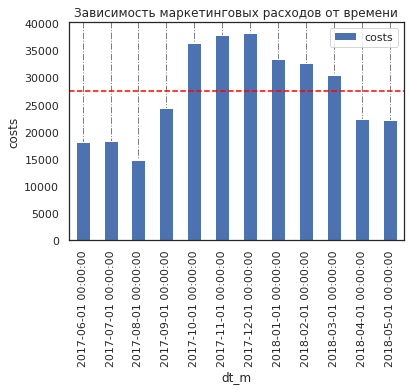

In [48]:
picture(costs_tm, 'dt_m', 'costs', 'bar', title ='Зависимость маркетинговых расходов от времени')

Из графика видно, что максимум расходов на рекламу приходится на сентябрь-март. Летом расходы на рекламу существенно ниже

Рассчитаем САС (стоимость привлечения клиента -сумма денег, во сколько обходится новый клиент компании) на одного покупателя для всего проекта и для каждого источника трафика.

Сначала расчет САС по всему проекту.

In [49]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month').sum()
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1020,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,1020,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,1020,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,1020,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,1020,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1063.05,1,0.300892,1025,30415.27,8.608907
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559,1025,30415.27,8.608907
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597,986,22289.38,9.793225
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599,986,22289.38,9.793225


In [50]:
output3 = report_new.pivot_table(index='first_order_month', values='cac', columns='age', aggfunc='mean')
output3 = output3.fillna(0)
output3

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091
2017-07-01,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,0.000000
2017-08-01,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,0.000000,0.000000
2017-09-01,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,0.000000,0.000000,0.000000
2017-10-01,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,0.000000,0.000000,0.000000,0.000000
2017-11-01,9.288870,9.288870,9.288870,9.288870,9.288870,9.288870,9.288870,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,8.741809,8.741809,8.741809,8.741809,8.741809,8.741809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,9.937302,9.937302,9.937302,9.937302,9.937302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,8.962758,8.962758,8.962758,8.962758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


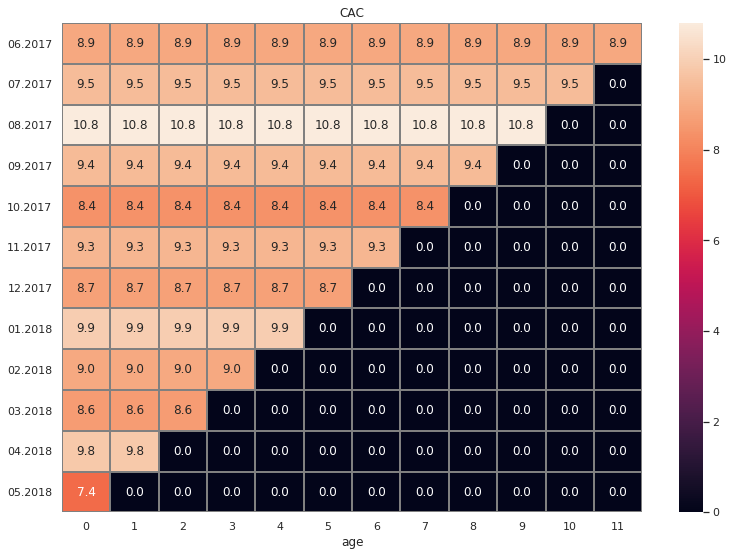

In [51]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('CAC')
output3.index = output3.index.strftime('%m.%Y')
sns.heatmap(output3, annot=True, fmt='.1f', linewidths=1, linecolor='gray'); 

САС для одной когорты одинаков по всему времени жизни когорт. Дороже всего для компании обошлись клиенты когорты августа 2017 и января 2018. Дешевле всего май 2018, но здесь у нас есть данные только по 1 месяцу жизни.

А теперь посмотрим стоимость привлечения клиента с каждого источника трафика

In [52]:
costs_source = (costs.groupby(['source_id']).agg({'costs':'sum'}))
users = visits.sort_values(by=['uid', 'start_ts']).groupby('uid').agg({'source_id':'first', 'session_month': 'first'})
users = users.reset_index().rename(columns = {'session_month':'month'})
buyers = users.query('uid in @orders.uid')
buyers = (buyers.groupby(['source_id']).agg({'uid': 'nunique'}))

report1 = buyers.join(costs_source)
report1['cost_per_buyer'] = report1['costs'] / report1['uid']
report1

,uid,costs,cost_per_buyer
source_id,,,
1,3654,20833.27,5.701497
2,3901,42806.04,10.973094
3,9705,141321.63,14.561734
4,9800,61073.60,6.232000
5,7041,51757.10,7.350817
7,1,NaN,NaN
9,1139,5517.49,4.844153
10,1282,5822.49,4.541724


Получили САС - расходы на одного клиента для каждого источника рекламного трафика. Построим график.

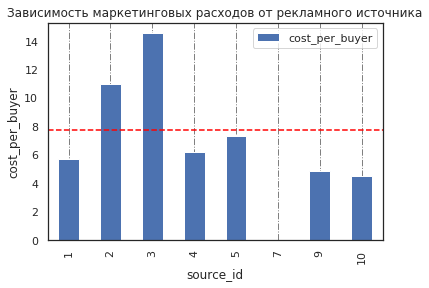

In [53]:
picture(report1.reset_index(), 'source_id', 'cost_per_buyer', 'bar', title='Зависимость маркетинговых расходов от рекламного источника')

Судя по графику, максимальные расходы на каждого клиента приходятся на источник №3, при этом он же является и самым затратным в плане вложений компании. В то время как источник №4(второй по затратности) и №5(третий по затратности) явлются более выгодными для вложений, с связи с низкой стоимостью привлечения клиента.

In [54]:
print('Средний САС по проекту {:.2f}'.format(report_new['cac'].mean()))

Средний САС по проекту 9.32


Рассчитаем ROMI (коэффициент возврата маркетинговых инвестиций) по когортам в разрезе по источникам. 

In [55]:
users = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first', 'session_month': 'first'})
sources = [1, 2, 3, 4, 5, 9, 10]
 
def romi(sources):
    for source  in sources:
        #отбираем только покупателей из нужного источника
        source_users = users.query('source_id == @source').index.values
        orders['first_buy_ts'] = orders['first_buy_ts'].astype('datetime64[M]')
        source_orders = orders.query('uid in @source_users')

        #формируем когорты
        cohort_sizes = (source_orders.groupby('first_buy_ts').agg({'uid':'nunique'}).reset_index())
        cohort_sizes.columns = ['first_buy_ts', 'n_buyers']
        cohorts = (source_orders.groupby(['first_buy_ts', 'order_month']).agg({'revenue':'sum'}).reset_index())
        report = pd.merge(cohort_sizes, cohorts, on='first_buy_ts')

        #считаем LTV
        margin_rate = 1.0
        report['gp'] = report['revenue'] * margin_rate
        report['age'] = (report['order_month'] - report['first_buy_ts']) / np.timedelta64(1, 'M')
        report['age'] = report['age'].round().astype('int')
        report['ltv'] = report['gp'] / report['n_buyers']

        output = report.pivot_table(index='first_buy_ts', values ='ltv', columns='age', aggfunc ='mean')
        output = output.cumsum(axis=1).fillna(0)
        #print(source)
        #display(output)

        #считаем САС для нужного источника
        source_costs = costs.query('source_id == @source')  
        source_costs = source_costs.groupby('month').agg({'costs':'sum'})
        source_costs = source_costs.join(cohort_sizes.set_index('first_buy_ts'))
        source_costs['cac'] = source_costs['costs'] / source_costs['n_buyers']

        #считаем ROMI                              
        romi_ = output.div(source_costs['cac'], axis=0)

        sns.set(style='white')
        plt.figure(figsize=(13, 9))
        plt.title('ROMI для источника номер ' +  str(source))
        romi_.index = romi_.index.strftime('%m.%Y')
        sns.heatmap(romi_, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
        plt.show()
    return plt.show()
 

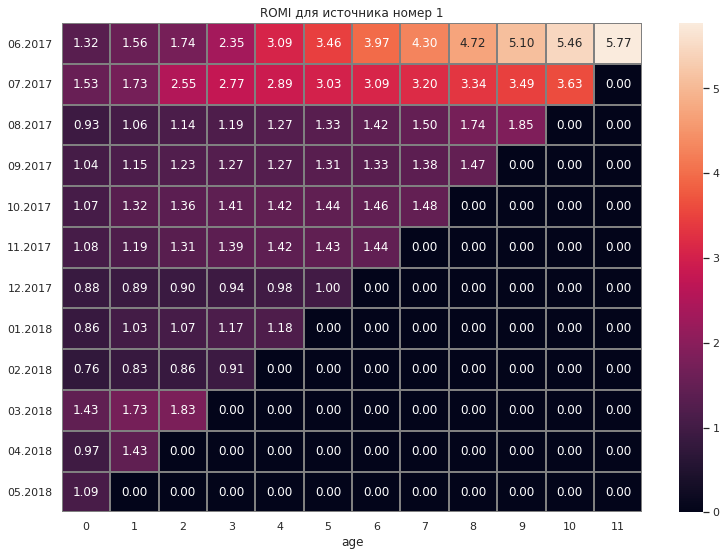

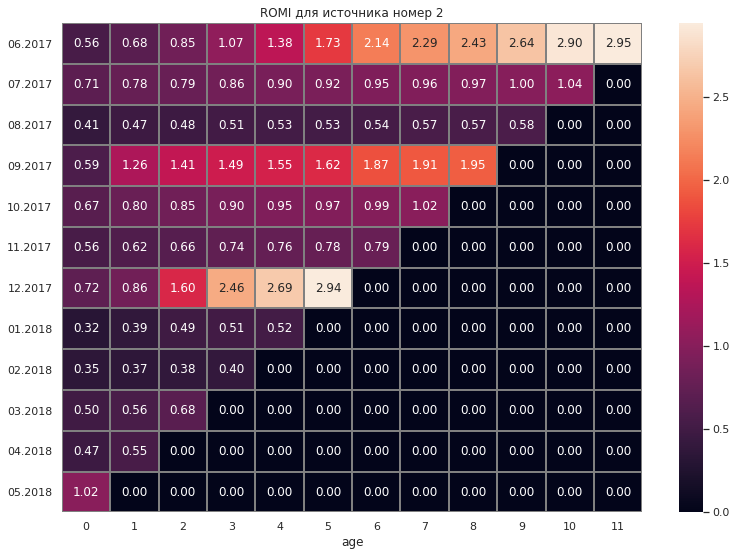

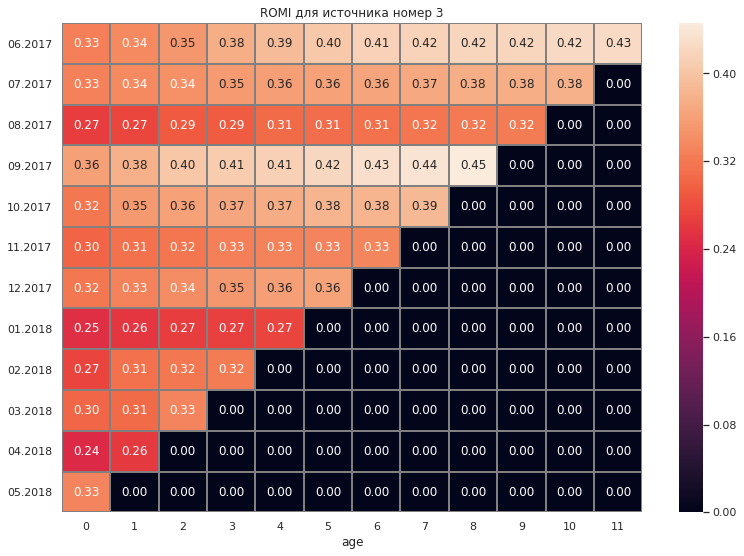

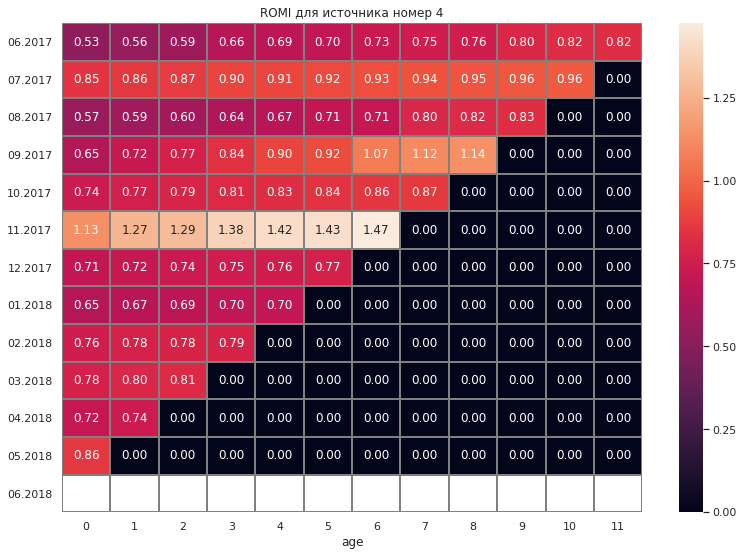

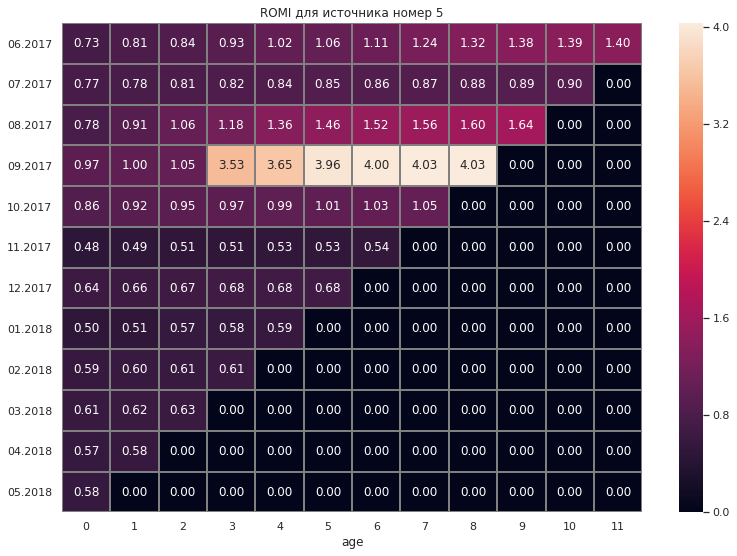

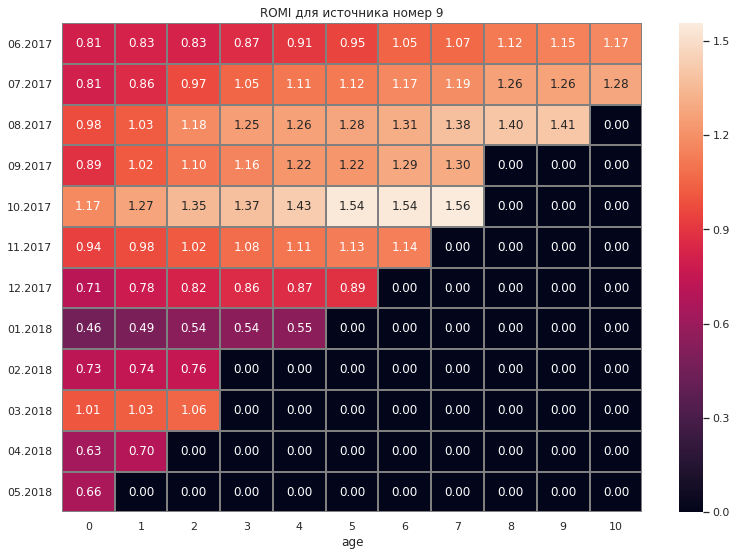

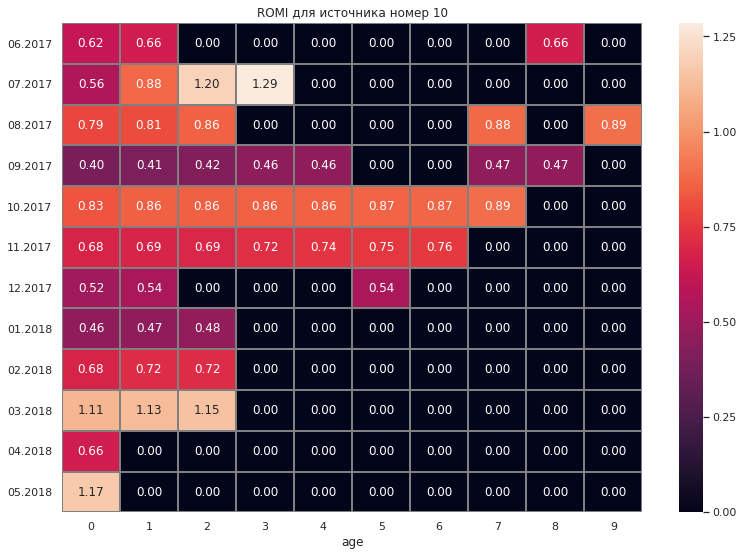

In [56]:
romi(sources)

Источник №1 - имеет высокую окупаемость для июньской и июлькой когорт, начиная с пятого месяца жизни, и в целом имеет хорошую оборачиваемость.

Источник №2 - цикличная высокая оборачиваемость в июне, сентябре и декабре.

Источник №3 - из-за высоких вложений компании в него и высокими тратами на 1 клиента, имеет крайне невысокую окупаемость, необходимо уменьшит вложения в него.

Источник №4 - высокая окупаемость для сентябрьской когорты на 7 месяц жизни, хороший показатель для ноябрьской когорты с 1 месяца жизни. Можно сохранить вливания.

Источник №5 - высокая окупаемость для когорты сентября с 4 месяца жизни.

Источник №9 - имеет хорошую окупаемость, учитывая небольшое количество вложений в него. Особенно в июле, августе, сентябре, октябре и марте. Можно увеличить маркетинговые вложения в него.

Источник №10 - пробелы связаны скорей всего с тем, что по этому источнику приходит мало покупателей. Но есть высокая окупаемость в марте и июне с 1 месяца жизни когорт.

#### Вывод
Проанализировали маркетинговые метрики. Подсчитали сумму расходов на маркетинг по источникам, рассчитали стоимость привлечения одного клиента и окупаемость маркетинговых вложений для разных исчтоников рекламы.

Видно, что из семи источников рекламы - компания на один (№3) из источников выделяет в разы больше денег, чем на остальные. Два источника (№9 и №10) - мало финансируются.
Максимальные расходы на каждого клиента приходятся на источник №3, при этом он же является и самым затратным в плане вложений компании. В то время как источник №4(второй по затратности) и №5(третий по затратности) явлются более выгодными для вложений, с связи с низкой стоимостью привлечения клиента.

Необходимо уменьшить маркетинговый бюджет на исчтоник №3, в связи с низкой окупаемостью.
Можно рассмотреть увеличение вливаний в источник №1, №4 и №9.
Самыми перспективными для компании когортами клиентов являются когорты июня, июля, сентября и октября. 


### Шаг 5. Общий вывод.

Проанализировали данные Яндекс.Афиши с июня 2017 по май 2018 года. Подготовили данные в анализу.

Рассчитали и проанализировали продуктовые, маркетинговые метрики и метрики электронной коммерции. 

С августа 2017 года наблюдаем активный рост числа новых пользователей в день, который с октября 2017 года стабильно превышал среднее значение новых пользователей. Пик приходится на конец ноября-начало декабря (возможно связан с активной продажей билетов перед новогодними праздниками, гастролями). В конце марта наблюдается резкое падение числа новых пользователей - связано скорей всего с закрытием театрального сезона. Графики по неделям и месяцам подтвердают наши выводы.

Пользователи в среднем посещают сайт 1 раз в день за день и проводят на нем судя по медианному значению 5 минут, этого времени вполне достаточно, чтобы ознакомится с предстоящими событиями в мире культуры. При этом большинство людей заходят на сайт всего на 1 минуту.

Коэффициент удержания клиентов максимальный в когорте сентября 2017, достаточно высок в июне, октябре и ноябре на второй месяц жизни когорт. На втором месяце жизни когорт в среднем возвращается 6,5% пользователей.

Среднее время совершения покупки 8,6 часа. При этом самое часто встречающее значение 0 секунд, и это нормально - часто бывает, что первое зарегистрированное событие от пользователя в системе это именно покупка. Но судя по среднему и медианному значению есть пользователи, которые достаточно долго делают выбор перед покупкой.

Среднее количество покупок на 1 покупателя составляет примерно 1,5 и растет, при этом практически не зависит от выбранной когорты. Однако в когорте июня число покупок растет быстрее. Возможно, что это запланированные заранее сделанные покупки билетов на гастроли или мероприятия уже в сентябре.

Средний чек по проекту равен 5. График зависимости среднего чека от времени имеет множество небольших пиков с периодичностью раз в три месяца, возможно это  связано с покупками дорогостоящих билетов. Большой пик приходится на декабрь (традиционно подъем цен на новогодние праздники и события).Максимум денег тратили клиенты сентябрской когорт с четвертого месяца жизни когорты и июньской с 7 месяца жизни когорты. Это подтверждает мнение, что дорогостоящие покупки делаются заранее - в июне на открытие сезона в сентябре и в сентябре уже на новогодние события.

Из семи источников рекламы - компания на один (№3) из источников выделяет в разы больше денег, чем на остальные. Два источника (№9 и №10) - мало финансируются. Максимальные расходы на каждого клиента приходятся на источник №3, при этом он же является и самым затратным в плане вложений компании. В то время как источник №4(второй по затратности) и №5(третий по затратности) явлются более выгодными для вложений, с связи с низкой стоимостью привлечения клиента. Необходимо уменьшить маркетинговый бюджет на исчтоник №3, в связи с низкой окупаемостью. Можно рассмотреть увеличение вливаний в источник №4 и №9. 
Самыми перспективными для компании когортами клиентов являются когорты июня, июля, сентября и октября. 
